In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image



In [44]:
df = pd.read_csv('acquisitions_update_2021 (1).csv')

df

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM


# Full Data Frame
Heres the unedited data frame that i used for this project.

# 1. Top Companies Making Acquisistions

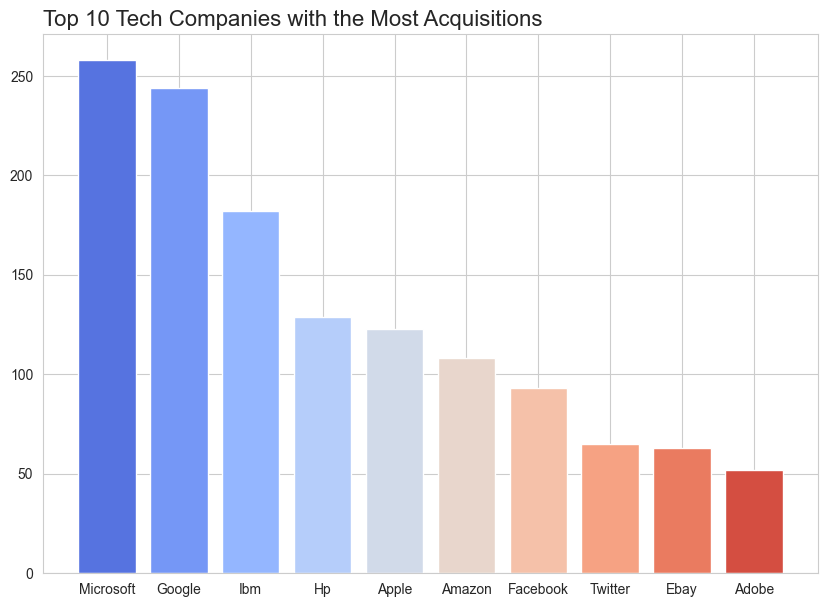

In [45]:
#Question 1: What were the top companies making aquisistions

top_companies = df.groupby('Parent Company')
top_companies.describe()

# Aggregate using an example function, like sum
top_companies_agg = df.groupby('Parent Company').count().reset_index()
top_companies_agg

# Group by 'Parent Company' and count the number of occurrences in each group
top_companies_count = df.groupby('Parent Company').size().reset_index(name='Count')

top_companies_sorted = top_companies_count.sort_values(by='Count', ascending=False).reset_index()
top_companies_sorted.head(10)

company_name = top_companies_sorted['Parent Company'].head(10)
mergers_and_aqu = top_companies_sorted['Count'].head(10)

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
#plt.bar(company_name[0:10], mergers_and_aqu[0:10])

# Use seaborn color palette
colors = sns.color_palette('coolwarm', len(company_name))

# Horizontal Bar Plot
bars = plt.bar(company_name, mergers_and_aqu, color=colors)

# Add Title
plt.title('Top 10 Tech Companies with the Most Acquisitions', loc='left', fontsize=16)

# Show Plot
plt.show()

In [46]:
# Replace non-numeric values with NaN
#df['Acquisition Year'] = pd.to_numeric(df['Acquisition Year'], errors='coerce')

# Convert 'Acquisition Year' to numeric type
#df['Acquisition Year'] = pd.to_numeric(df['Acquisition Year'])

# Find the lowest year
#lowest_year = df['Acquisition Year'].min()

#print(f"The lowest year in the dataset is: {lowest_year}")

## Top Acquisitions Observations
From the data we can observe the top companies doing acquisitions amoung our tech companies with Microsoft in the lead with 250+ companies acquired since 1957.

# 2. Relationship Between Acquisitions and Years

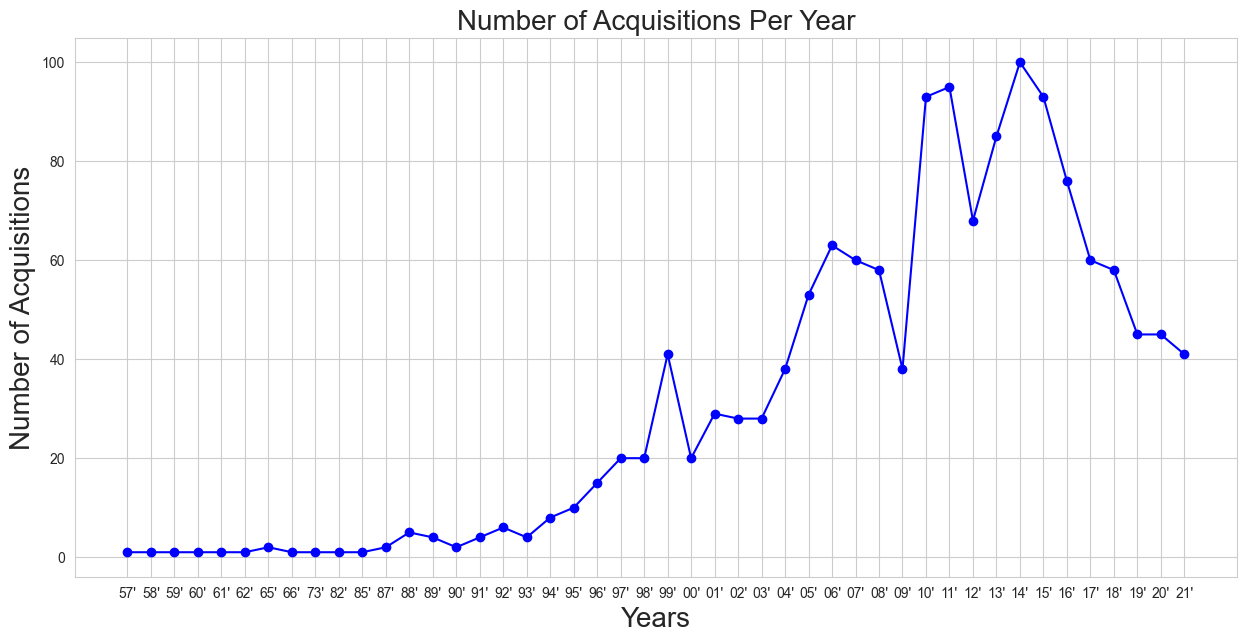

In [47]:
# Question 2: Relationship between aquisitions and years
df
Aqu_per_year = df.groupby('Acquisition Year').size().reset_index(name = 'count').drop(0).reset_index()
Aqu_per_year

def extract_last_two(year):
    return year[-2:]

# Extract the last two digits of each year for labeling
Aqu_per_year['YearLabel'] = Aqu_per_year['Acquisition Year'].apply(extract_last_two)

# Plotting the line graph
plt.figure(figsize=(15, 7))
plt.plot(Aqu_per_year['YearLabel'] + "'", Aqu_per_year['count'] , marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Number of Acquisitions Per Year', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Number of Acquisitions', fontsize=20)

# Show grid for better readability
plt.grid(True)
sns.set_style("whitegrid")
# Show the plot
#plt.tight_layout()
plt.show()


## Acquisition Boom and Cool-Off
Throughout the years we can observe that the trend of these companies making acquisitions has increased substantially since 1998, peaking in 2014. The current trend of these companies making acquisitions is currently on a decline with around 40 per year.

# 3. Most Reoccuring Types of Businesses Acquired

In [48]:
# Correct path to the new image on your Desktop
image_path = 'vecteezy_solid-cloud-illustration-glyph-icon_5502367.jpg'

# Load the image
cloud_mask = np.array(Image.open(image_path))

#cloud_mask

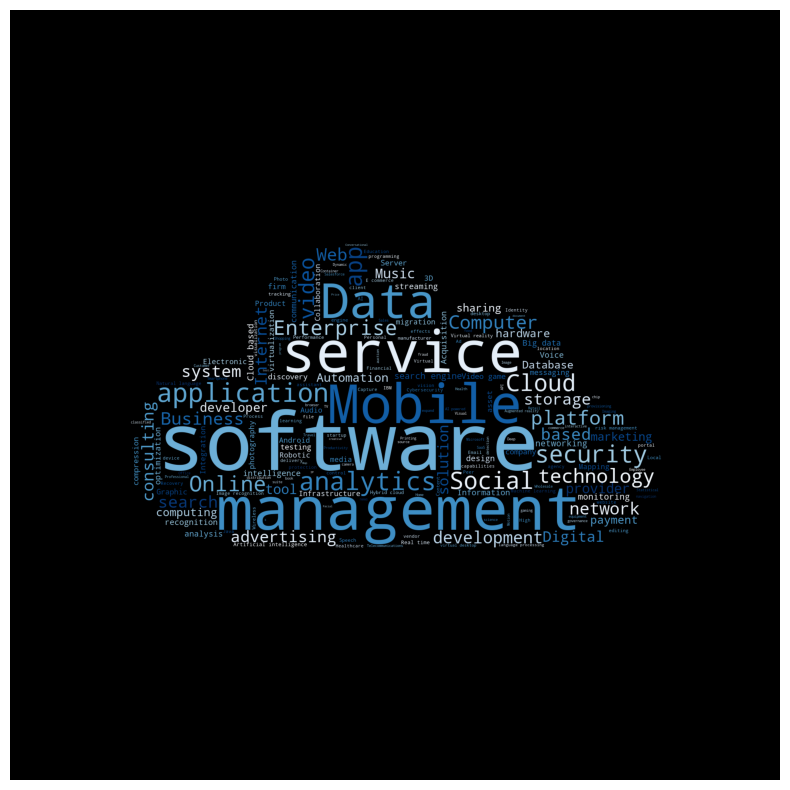

In [49]:
# Question 3: Most reoccuring types of businesses
words = df.groupby('Business').size().reset_index(name='Count').drop(1)
word_count = words.sort_values(by='Count', ascending=False).reset_index()
word = word_count['Business']
word

# Convert the 'Business' column into a single string of words
words_string = ' '.join(word_count['Business'])



wc = WordCloud(mask = cloud_mask,background_color='black', colormap = 'Blues',width = 3000, height = 2500).generate(words_string)
plt.figure(figsize=(12, 10)) 
plt.axis("off")
plt.imshow(wc)

## Acquisition Decision
The Top types of companies aquired have to do with software, managment, mobile, and service to name a few.

# 4. Popular Months for Acquisitions

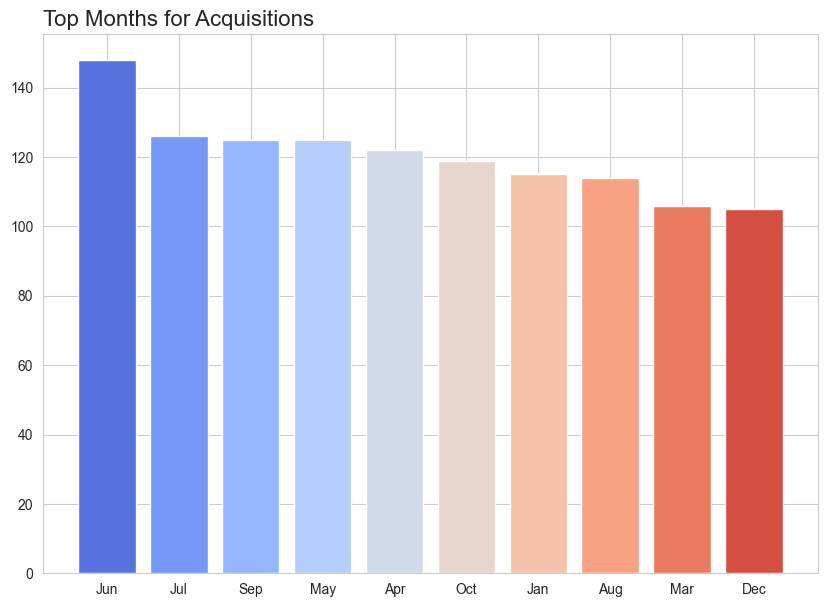

In [50]:
df
months = df.groupby('Acquisition Month').size().reset_index(name='Count').sort_values(by='Count', ascending=False).drop(0)
months

month = months['Acquisition Month'].head(10)
acquis = months['Count'].head(10)

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Use seaborn color palette
colors = sns.color_palette('coolwarm', len(company_name))

# Horizontal Bar Plot
bars = plt.bar(month, acquis, color=colors)

# Add Title
plt.title('Top Months for Acquisitions', loc='left', fontsize=16)

# Show Plot
plt.show()

In [51]:
#months['Season'] = 0
def SeasonClassify(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    elif month in ['Sep', 'Oct', 'Nov']:
        return 'Fall'
    else:
        return 'Unknown' 
    
months['Season'] = months['Acquisition Month'].apply(SeasonClassify)
months

,Acquisition Month,Count,Season
7,Jun,148,Summer
6,Jul,126,Summer
12,Sep,125,Fall
9,May,125,Spring
1,Apr,122,Spring
11,Oct,119,Fall
5,Jan,115,Winter
2,Aug,114,Summer
8,Mar,106,Spring
3,Dec,105,Winter


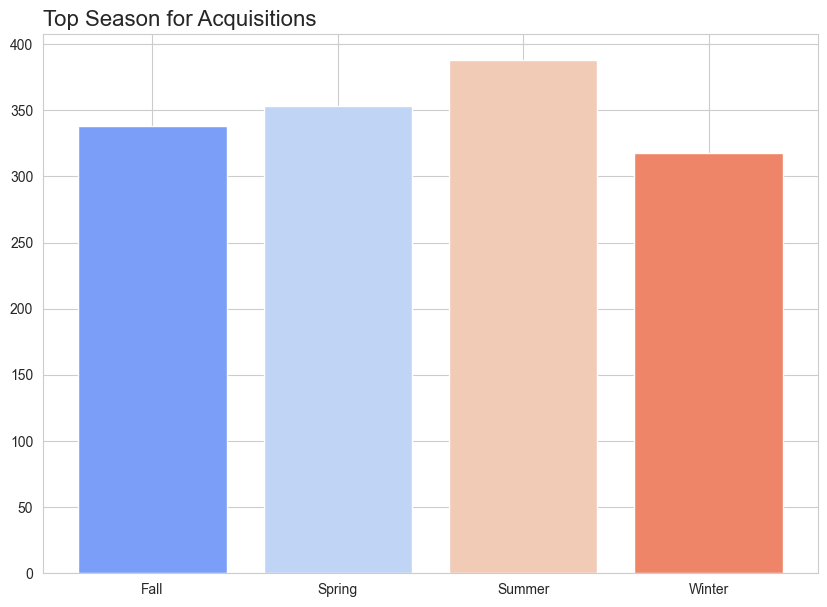

,Acquisition Month,Count,Season
Season,,,
Fall,SepOctNov,338,Fall
Spring,MayAprMar,353,Spring
Summer,JunJulAug,388,Summer
Winter,JanDecFeb,318,Winter


In [52]:
season_acquis = months.groupby('Season').sum()
season_acquis['Season'] = ('Fall', 'Spring', 'Summer', 'Winter')
season =  season_acquis['Season'].head(4)
acquis_per_season = season_acquis['Count'].head(4)

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Use seaborn color palette
colors = sns.color_palette('coolwarm', len(season))

# Horizontal Bar Plot
bars = plt.bar(season, acquis_per_season, color=colors)

# Add Title
plt.title('Top Season for Acquisitions', loc='left', fontsize=16)

# Show Plot
plt.show()
season_acquis 

## Acquisitions Heating Up
Acquisitions peak season is the summer while the least aqcuisitions occur during the winter.

In [53]:
# Question 1: What were the top companies making aquisistions 
# Question 2: Relationship between aquisitions and years
# Question 3: Most reoccuring word in types of businesses
# Question 4: What months do these deals happen the most
# Question 5: Which country makes the most aquisitions
# Question 6: Histogram of Prices paid for the companies
# Question 7: Portfolio of Microsoft?
# Question 8: Portfolio of Google?
# Question 9: Portfolio of Apple?
# Question 10: What types of companies will be acquired in the future?
